# Using data web services
We show the use of data web services Python interface for an use case: temperature data from [Svalbard](https://en.wikipedia.org/wiki/Svalbard).

## Load data and metadata 
Import the data web service Python interface. The data web service interface can be found here: https://github.com/rkoppe/dws. Download the dws.py file and place it into your working directory.

In [1]:
from dws import dws
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

Find some sensors offering temperature at Svalbard. Visit https://sensor.awi.de to explore platforms, devices and sensors and find useful platforms and further metadata. Platforms, devices and sensors have codes (aka urn) identifying measurements.

In [2]:
sensors = dws.sensors('station:svluwobs*temperature*')
pd.DataFrame.from_dict(sensors)

,code,id,lastDate,lastQualityFlag,lastValue,logicalCode,platformId,sensor,unit
0,station:svluwobs:svluw2:ctd_181_profiling:temp...,1755,2019-06-20T08:22:19.5,0,4.810000,station:svluwobs:svluw2:ctd_181:temperature_aw...,58,station:svluwobs:svluw2:ctd_181_profiling:temp...,NaN
1,station:svluwobs:svluw2:ctd_103:temperature_aw...,1257,2015-07-24T23:50:00,0,4.948709,station:svluwobs:svluw2:ctd:temperature_awi:te...,58,station:svluwobs:svluw2:ctd_103:temperature_aw...,°C
2,station:svluwobs:svluw2:seafet_obsvlfr_007:ph_...,1765,2019-06-26T06:55:01,0,6.259900,station:svluwobs:svluw2:seafet_obsvlfr:ph_temp...,58,station:svluwobs:svluw2:seafet_obsvlfr_007:ph_...,NaN
3,station:svluwobs:svluw2:adcp_awi_23789:tempera...,1215,2019-06-26T00:00:00,0,546.600000,station:svluwobs:svluw2:adcp_awi:temperature,58,station:svluwobs:svluw2:adcp_awi_23789:tempera...,°C
4,station:svluwobs:svluw2:adcp_awi_17374:tempera...,1260,2016-12-08T02:00:00,0,83.200000,station:svluwobs:svluw2:adcp_awi:temperature,58,station:svluwobs:svluw2:adcp_awi_17374:tempera...,°C
5,station:svluwobs:fb_731101:durafet_obsvlfr_01:...,1576,2019-06-26T07:00:00,0,6.268117,station:svluwobs:fb:durafet_obsvlfr:hw_tempera...,58,station:svluwobs:fb_731101:durafet_obsvlfr_01:...,NaN
6,station:svluwobs:fb_731101:ph_awi_01:temperature,1574,2019-06-26T07:00:00,0,6.862334,station:svluwobs:fb:ph_awi:temperature,58,station:svluwobs:fb_731101:ph_awi_01:temperature,NaN
7,station:svluwobs:fb_731101:hydrofia_awi_031700...,1885,2019-06-24T17:54:07,0,1.000000,station:svluwobs:fb:hydrofia_awi:invalid_tempe...,58,station:svluwobs:fb_731101:hydrofia_awi_031700...,
8,station:svluwobs:fb_731101:oxygen_awi_574:temp...,750,2019-06-26T07:00:00,0,6.419167,station:svluwobs:fb:oxygen_awi:temperature,58,station:svluwobs:fb_731101:oxygen_awi_574:temp...,°C
9,station:svluwobs:fb_731101:hydrofia_awi_031700...,1892,2019-06-24T17:54:07,0,25.013000,station:svluwobs:fb:hydrofia_awi:temperature_s...,58,station:svluwobs:fb_731101:hydrofia_awi_031700...,°C


Load data for temperature from the CTD 181. By default the service returns hourly averaged values. See http://dashboard.awi.de/data-xxl/ for details of the service.

In [3]:
data = dws.get("station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature", "2018-10-15", "2018-11-05")
data.head()

,datetime,station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature (mean) []
0,2018-11-04 12:00:00,1.929671
1,2018-11-04 13:00:00,1.726472
2,2018-11-04 14:00:00,1.802425
3,2018-11-04 15:00:00,1.755569
4,2018-11-04 17:00:00,1.772445


Plot the data against time.

Populating the interactive namespace from numpy and matplotlib


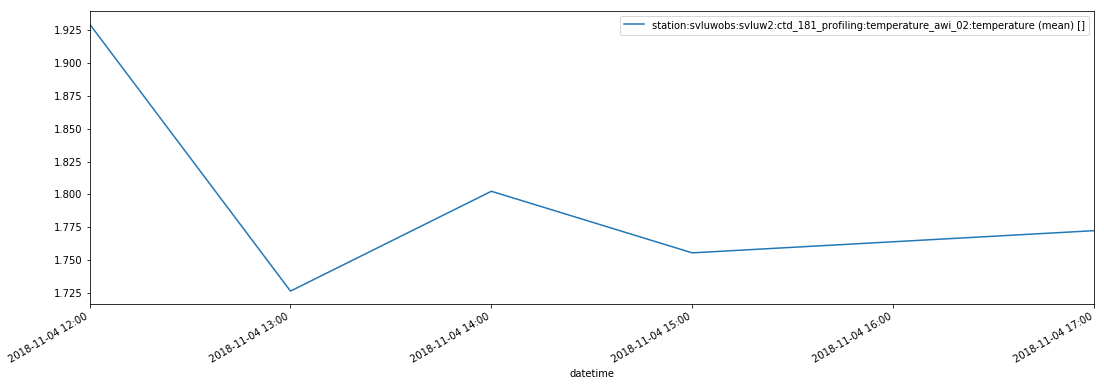

In [4]:
# size plot
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

# plot data
p = data.plot(x = "datetime", y = "station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature (mean) []")
p.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.show()

Load basic sensor metadata with the selected code. See https://sensor.awi.de/?urn=station:svluwobs:svluw2:ctd_181:temperature_sensor_01 for more information about this sensor. Note: there are some mapping issues for this example - they will be fixed soon.

In [5]:
sensor = dws.sensor("station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature")
sensor

{'id': 59516,
 'name': 'temperature',
 'type': 'temperature',
 'description': 'temperature',
 'definition': 'AWI',
 'unit': '°C',
 'properties': {'test': {'id': 109083,
   'lower': -2.0,
   'upper': 36.0,
   'unit': '°C'},
  'local_range': {'id': 109084, 'lower': -1.9, 'upper': 10.0, 'unit': '°C'},
  'crit_spike_value': {'id': 109085, 'lower': 1.5, 'upper': 1.5, 'unit': '°C'},
  'crit_gradient_value': {'id': 109086,
   'lower': 1.0,
   'upper': 1.0,
   'unit': '°C'},
  'accuracy': {'id': 109087, 'lower': 0.005, 'upper': 0.005, 'unit': '°C'},
  'manufacturer_range': {'id': 109088,
   'lower': -2.0,
   'upper': 35.0,
   'unit': '°C'}}}

Load the whole platform metadata.

In [6]:
meta = dws.meta("station:svluwobs")
meta

{'id': 220,
 'code': 'station:svluwobs',
 'shortName': 'SVLUWOBS',
 'longName': 'AWIPEV  Underwater Observatory Svalbard',
 'description': 'AWIPEV underwater observatory is an experimental field station (id: svluwobs) operated jointly by the AWI and the Helmholtz Centre Geesthacht (Germany). The station hosts multiple sensors and sensor units in the Kongsfjorden ecosystem. The station comprise a land based FerryBox system (small scale facility - id: svluw2) and a cabled underwater observatory (small scale facility - id: fb_73001). The cabled underwater observatory and the pumps of the FerryBox are installed on an underwater platform in 12m water depth close to the so called "Old Pier" off NyAlesund. The FerryBox and the cabled underwater observatory are both equipped with (redundant) multiple sensors and are designed to also host sensors from external cooperation partners. The underwater observatory provides power and Gbit internet connection at five independant wet-matable underwater 

We have defined measurement properties like "measurement range" for our temperature measure. Apply it to the data.

In [7]:
range = meta['map']['station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature']['properties']['local_range']
range

{'name': 'local_range', 'lower': -1.9, 'upper': 10.0, 'unit': '°C'}

The CTD is profiling temperature in the water column. Explore data.

In [9]:
sensors = dws.sensors("station:svluwobs:svluw2:ctd_181*")
pd.DataFrame.from_dict(sensors)

,code,id,lastDate,lastQualityFlag,lastValue,logicalCode,platformId,sensor,unit
0,station:svluwobs:svluw2:ctd_181_profiling:pres...,1754,2019-06-20T08:22:19.5,0,3.18,station:svluwobs:svluw2:ctd_181:pressure_awi:p...,58,station:svluwobs:svluw2:ctd_181_profiling:pres...,NaN
1,station:svluwobs:svluw2:ctd_181_profiling:temp...,1755,2019-06-20T08:22:19.5,0,4.81,station:svluwobs:svluw2:ctd_181:temperature_aw...,58,station:svluwobs:svluw2:ctd_181_profiling:temp...,NaN
2,station:svluwobs:svluw2:ctd_181_profiling:cond...,1756,2019-06-20T08:22:19.5,0,33.32,station:svluwobs:svluw2:ctd_181:conductivity_a...,58,station:svluwobs:svluw2:ctd_181_profiling:cond...,NaN
3,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,1757,2019-06-20T08:22:19.5,0,100.00,station:svluwobs:svluw2:ctd_181:oxygen_awi:oxy...,58,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,NaN
4,station:svluwobs:svluw2:ctd_181_profiling:fluo...,1758,2019-06-20T08:22:19.5,0,48.95,station:svluwobs:svluw2:ctd_181:fluorescence_a...,58,station:svluwobs:svluw2:ctd_181_profiling:fluo...,NaN
5,station:svluwobs:svluw2:ctd_181_profiling:turb...,1759,2019-06-20T08:22:19.5,0,156.46,station:svluwobs:svluw2:ctd_181:turbidity_awi:...,58,station:svluwobs:svluw2:ctd_181_profiling:turb...,NaN
6,station:svluwobs:svluw2:ctd_181_profiling:cond...,1760,2019-06-20T08:22:19.5,0,35.04,station:svluwobs:svluw2:ctd_181:conductivity_a...,58,station:svluwobs:svluw2:ctd_181_profiling:cond...,NaN
7,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,1761,2019-06-20T08:22:19.5,0,13.21,station:svluwobs:svluw2:ctd_181:oxygen_awi:oxy...,58,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,NaN
8,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,1762,2019-06-20T08:22:19.5,0,9.25,station:svluwobs:svluw2:ctd_181:oxygen_awi:oxy...,58,station:svluwobs:svluw2:ctd_181_profiling:oxyg...,NaN
9,station:svluwobs:svluw2:ctd_181:conductivity_a...,446,2019-06-20T08:01:21.5,0,35.19,station:svluwobs:svluw2:ctd:conductivity_awi:s...,58,station:svluwobs:svluw2:ctd_181:conductivity_a...,PSU


In [11]:
data = dws.get(
  ["station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature", "station:svluwobs:svluw2:ctd_181_profiling:pressure_awi_02:pressure"],
  begin="2018-10-01",
  end="2018-11-05",
  aggregate = "hour")
data.head()

,datetime,station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature (mean) [],station:svluwobs:svluw2:ctd_181_profiling:pressure_awi_02:pressure (mean) []
0,2018-11-04 12:00:00,1.929671,9.984364
1,2018-11-04 13:00:00,1.726472,9.799083
2,2018-11-04 14:00:00,1.802425,9.607586
3,2018-11-04 15:00:00,1.755569,9.504827
4,2018-11-04 17:00:00,1.772445,8.238086


Populating the interactive namespace from numpy and matplotlib


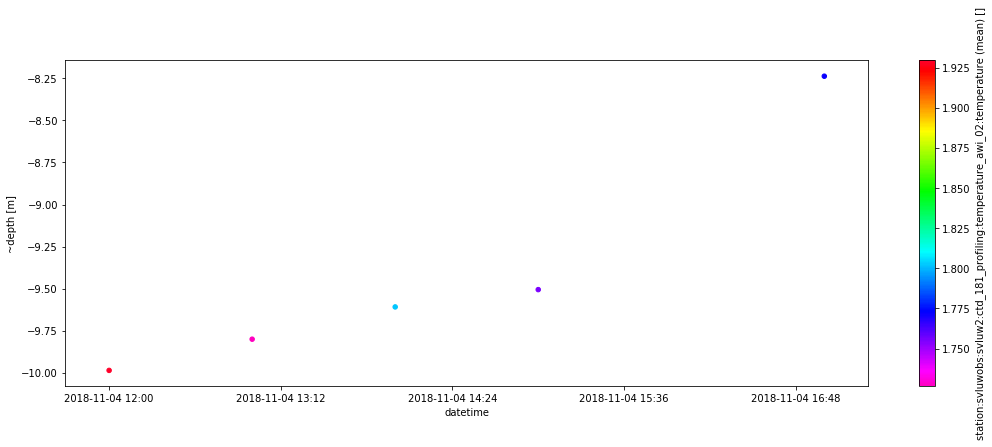

In [13]:
# size plot
%pylab inline
pylab.rcParams["figure.figsize"] = (18, 6)

# plot data
#data["timestamp"] = data["datetime"].astype(np.int64)/1e12
data["timestamp"] = mdates.date2num(data["datetime"])
data["depth"] = -data["station:svluwobs:svluw2:ctd_181_profiling:pressure_awi_02:pressure (mean) []"]
p = data.plot.scatter(
    x = "timestamp",
    y = "depth",
    c = "station:svluwobs:svluw2:ctd_181_profiling:temperature_awi_02:temperature (mean) []",
    colormap = "gist_rainbow_r",
    sharex = False)
p.set_xticklabels([mdates.num2date(ts).strftime("%Y-%m-%d %H:%M") for ts in p.get_xticks()])
plt.xlabel("datetime")
plt.ylabel("~depth [m]")
plt.show()